In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_raw=pd.read_csv("C:/Users/skand/Downloads/offre_skills01_new.csv")

In [3]:
data_raw.head()

,text,droit commercial,droit des garanties,droit fiscal des entreprises,droit patrimonial,régime matrimonial,succession,Droit bancaire,droit des contrats,droit commercial .1,...,management,planification,organisationnel,hiérarchie,ordre,règlement,système gestion,ONU,plan,Agenda
0,JURISTE IT H/F Détail de l'offre Informations ...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
1,JURISTE FINANCEMENTS STRUCTURÉS H/F Détail de ...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,CDD - JURISTE CONSEIL GOUVERNANCE F/H Paris CD...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,JURISTE BANCAIRE-DROIT DES AFFAIRES H/F PARIS ...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
4,JURISTE (H/F) - NATIXIS INTEREPARGNE Paris CDI...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
data_raw.columns[1:]

Index(['droit commercial ', 'droit des garanties ',
       'droit fiscal des entreprises ', 'droit patrimonial ',
       'régime matrimonial ', 'succession ', 'Droit bancaire',
       'droit des contrats ', 'droit commercial .1', 'droit des garanties .1',
       ...
       'management ', 'planification', 'organisationnel', 'hiérarchie ',
       'ordre ', 'règlement ', 'système gestion', 'ONU  ', 'plan', 'Agenda '],
      dtype='object', length=137)

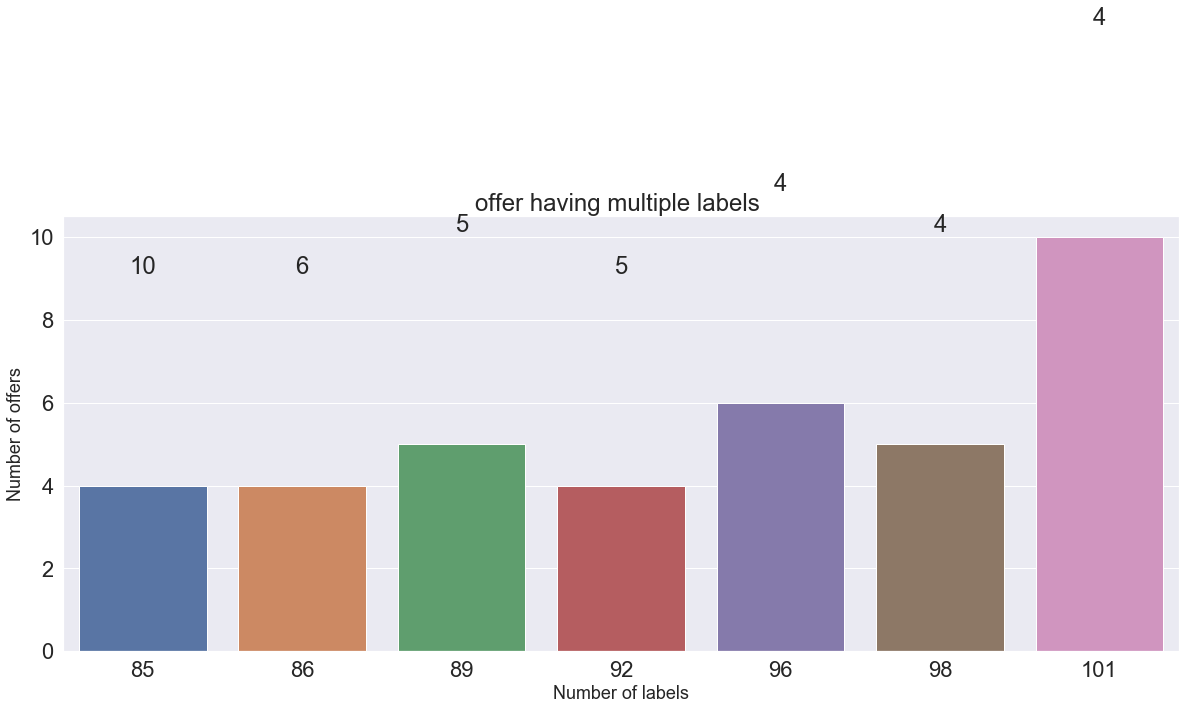

In [5]:
rowSums = data_raw.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()[:8]
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(20,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("offer having multiple labels ")
plt.ylabel('Number of offers', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [6]:
!pip install WordCloud

## Data preProcess

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
data = data_raw
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
data['text'] = data['text'].str.lower()
data['text'] = data['text'].apply(cleanHtml)
data['text'] = data['text'].apply(cleanPunc)
data['text'] = data['text'].apply(keepAlpha)

In [8]:
stop_words_lst=["alors","au","aussi","la","vous","avec","en","de","des","les","et","re","exp","sur","ou","plus","que","un","une","le","ainsi","dans","du","comme",]
def removeStopWords(sentence):
    for w in stop_words_lst:
        pattern = r'\b'+w+r'\b'
        sentence = re.sub(pattern, '', sentence)
    return sentence
data['text'] = data['text'].apply(removeStopWords)

### WordCloud representation of most used words in some categories of offers.

##### Planification:

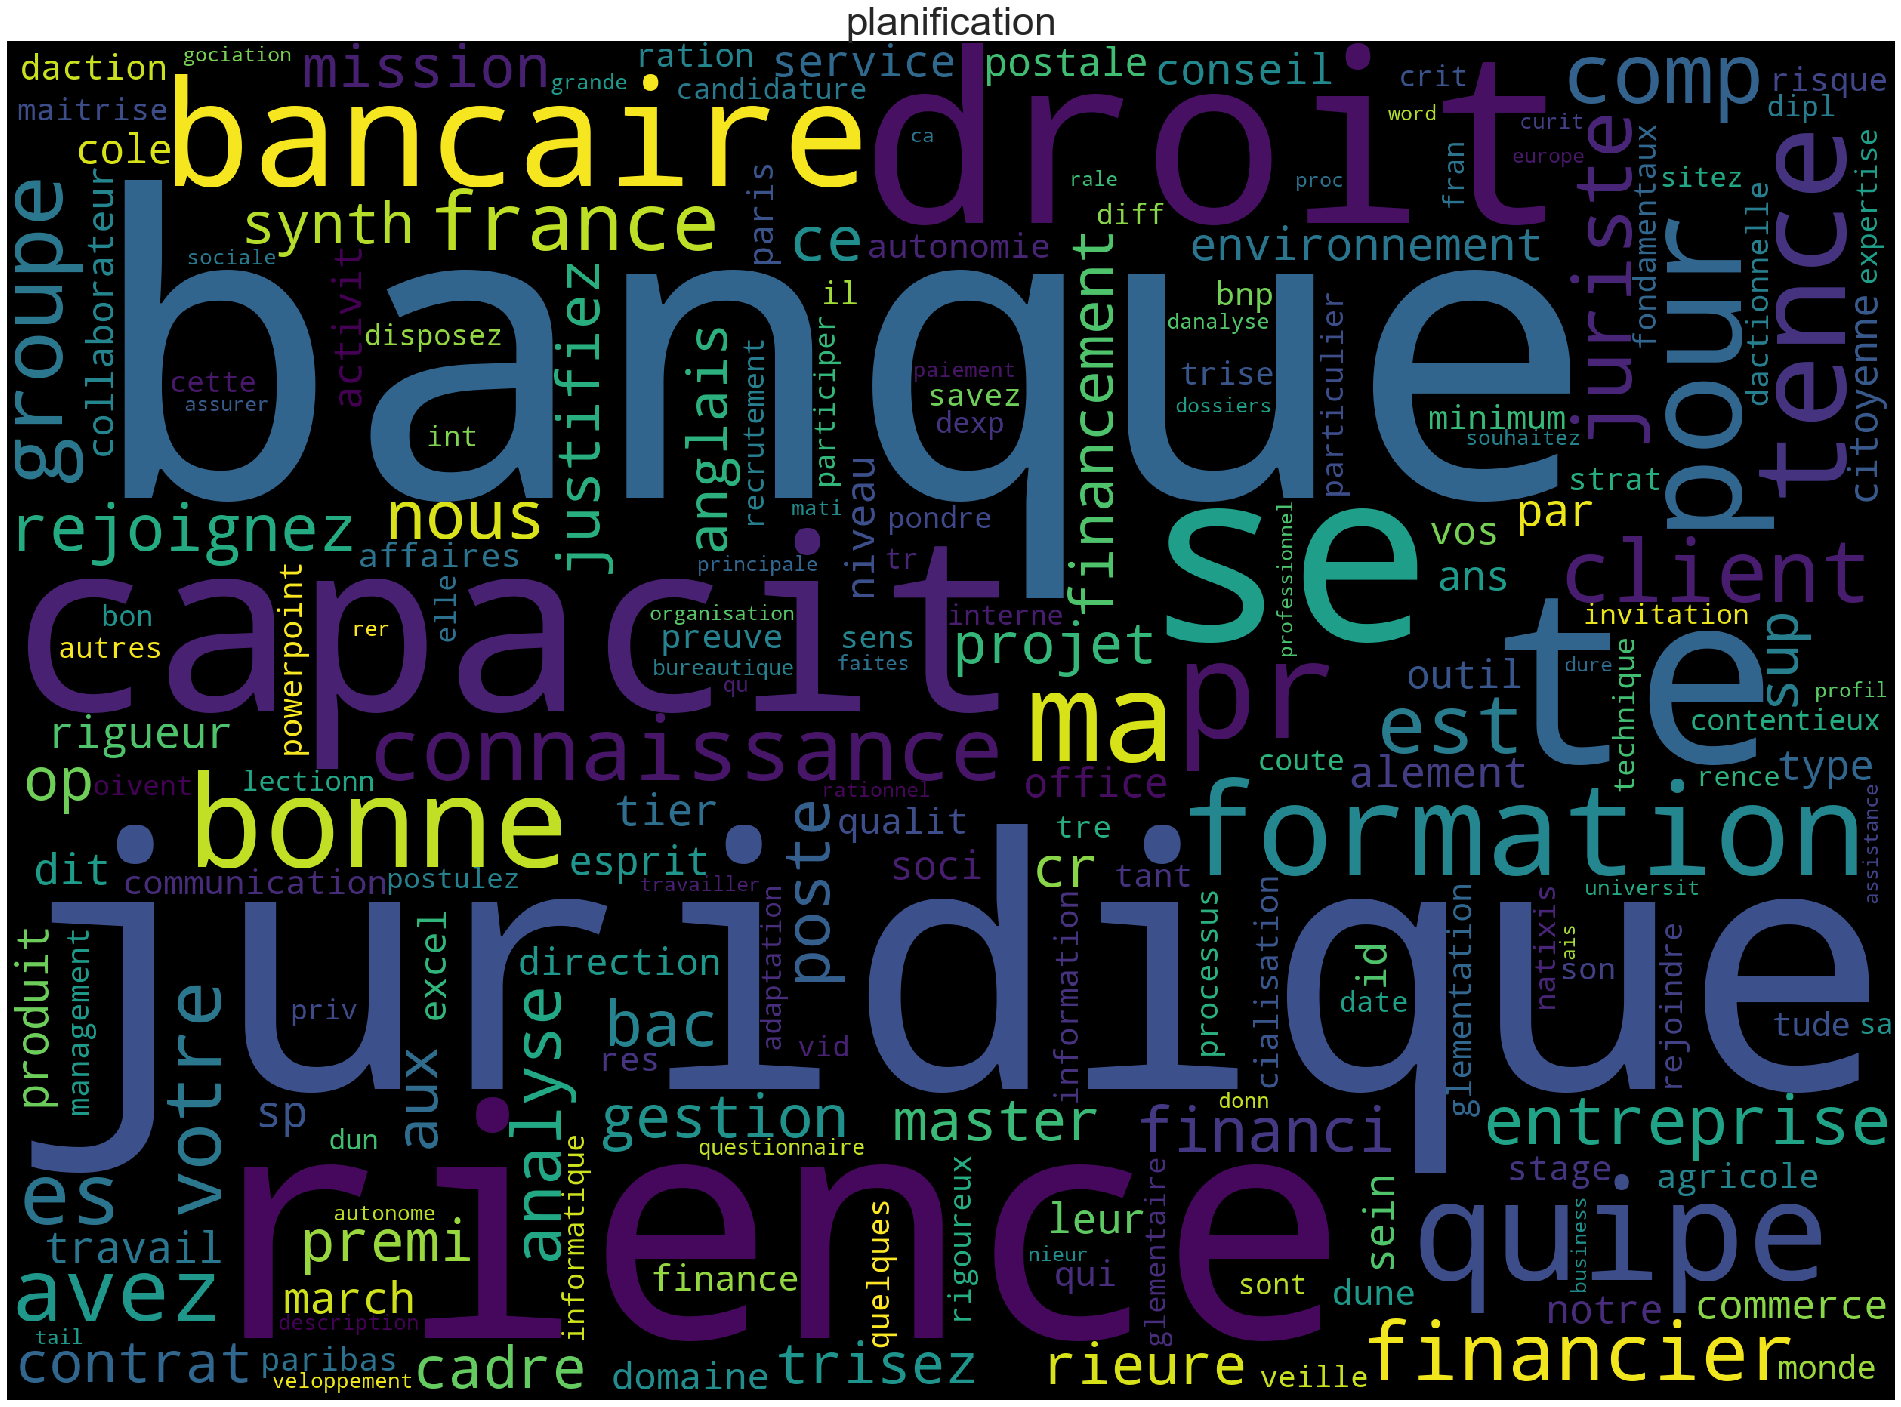

In [9]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# droit commerciam
subset = data_raw[data_raw.planification==True]
text = subset.text.values
cloud_planification = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("planification",fontsize=40)
plt.imshow(cloud_planification)

##### plan

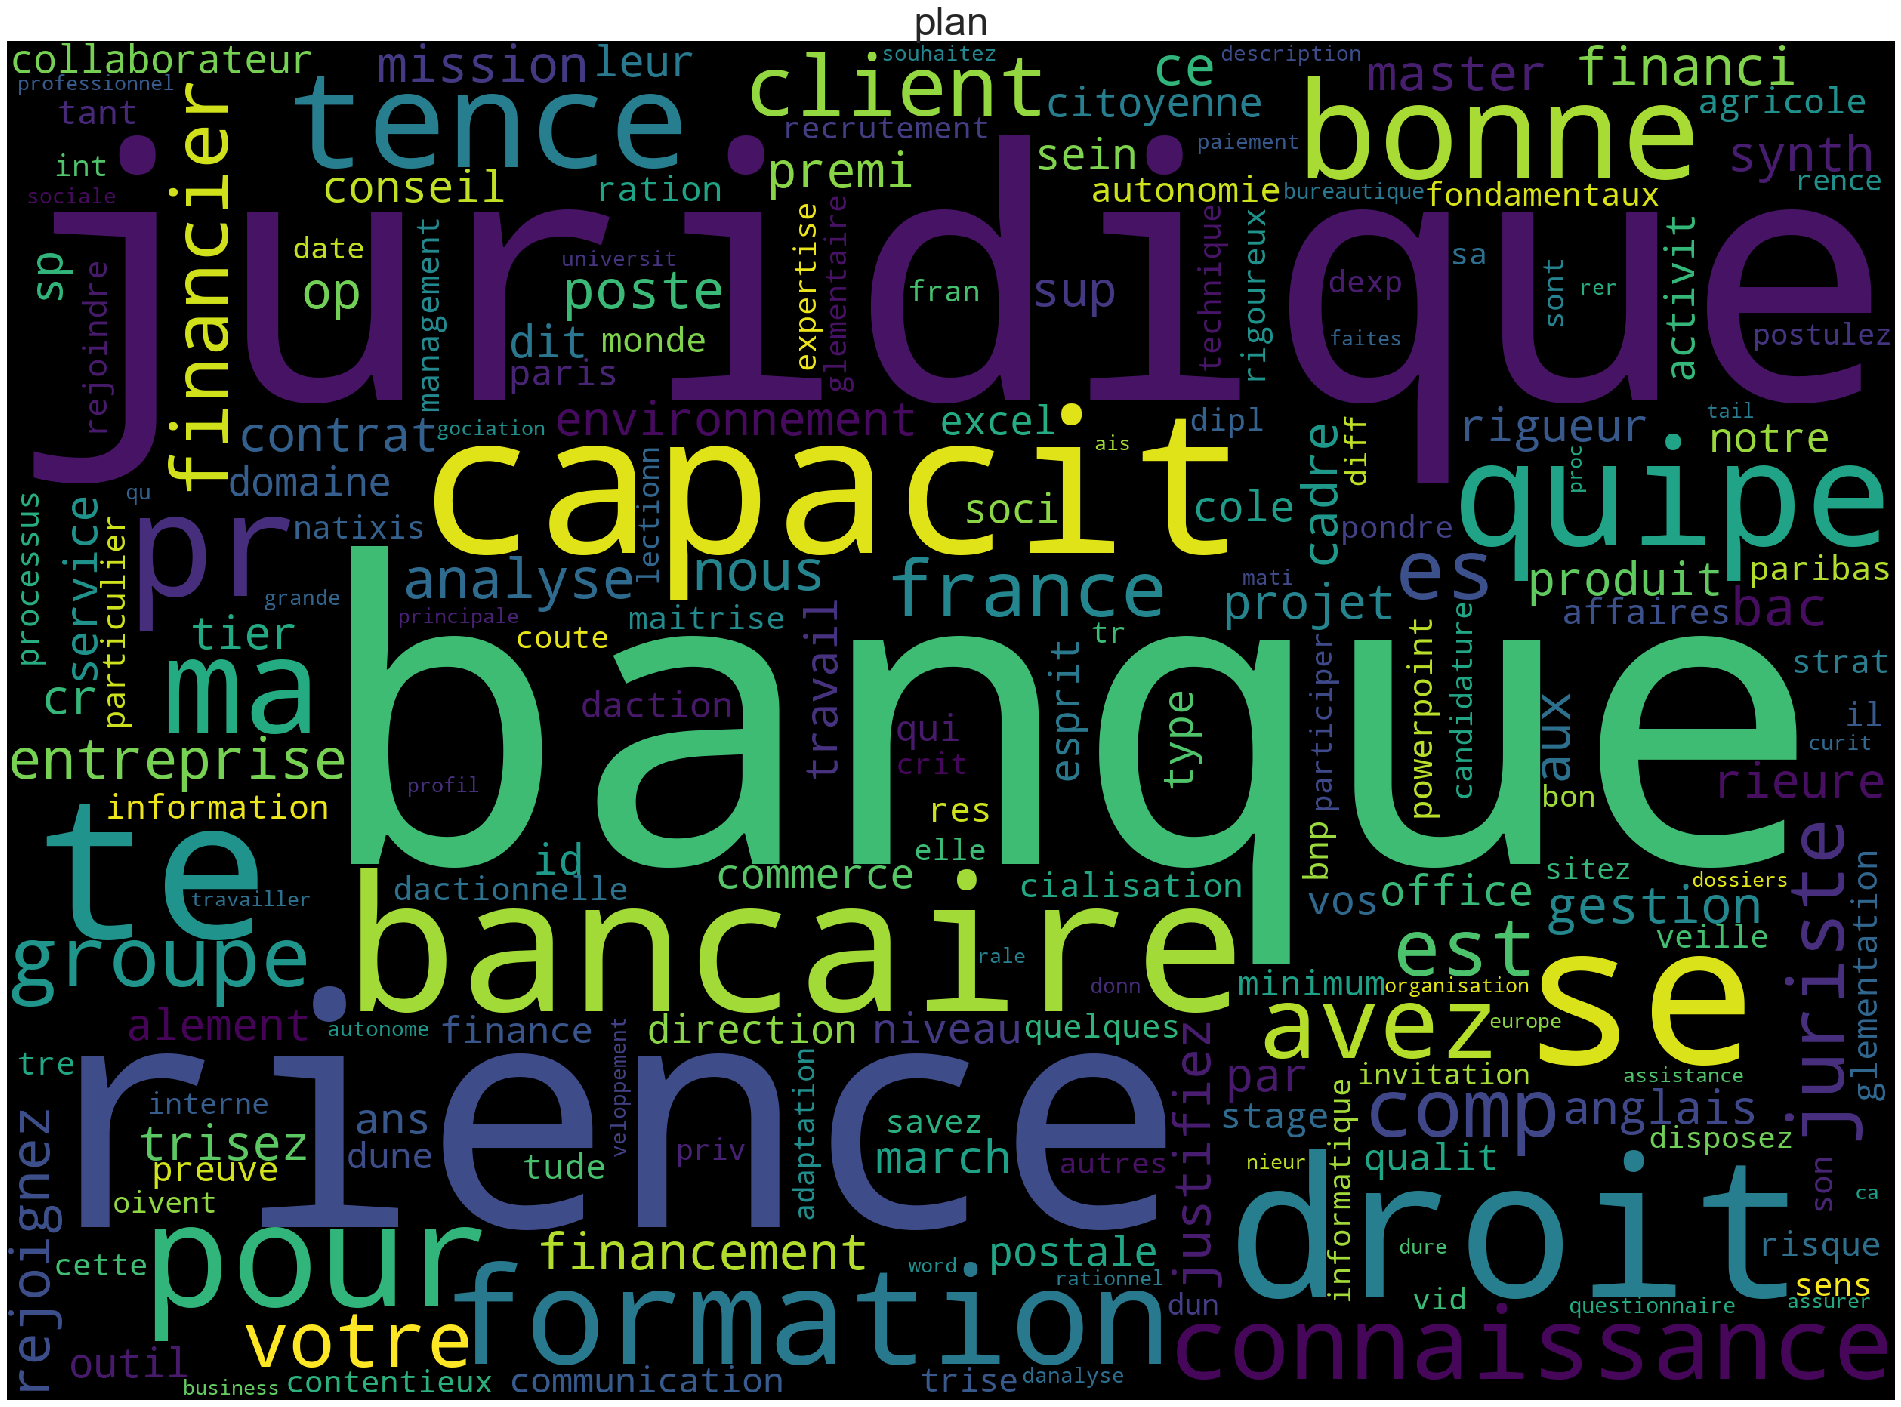

In [10]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# droit commerciam
subset = data_raw[data_raw.plan==True]
text = subset.text.values
cloud_ONU = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("plan",fontsize=40)
plt.imshow(cloud_ONU)

In [11]:
df=data_raw.iloc[:,1:]
skills = df.columns.values
sentences = list(data_raw["text"])

In [12]:
X = []
for s in sentences:
    X.append(removeStopWords(s))

y = data_raw.iloc[:,1:].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [49]:
!pip install keras

In [16]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

Using TensorFlow backend.


In [17]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [77]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('C:/Users/skand/Downloads/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [25]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(137, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [26]:
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 200, 100)          366100    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 137)               17673     
Total params: 501,021
Trainable params: 134,921
Non-trainable params: 366,100
_________________________________________________________________
None


In [27]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 265 samples, validate on 67 samples
Epoch 1/5
265/265 [==============================] - 3s 11ms/step - loss: 0.6927 - acc: 0.8005 - val_loss: 0.6871 - val_acc: 0.7947
Epoch 2/5
265/265 [==============================] - 3s 11ms/step - loss: 0.6855 - acc: 0.8294 - val_loss: 0.6791 - val_acc: 0.7982
Epoch 3/5
265/265 [==============================] - 5s 18ms/step - loss: 0.6768 - acc: 0.8299 - val_loss: 0.6644 - val_acc: 0.8036
Epoch 4/5
265/265 [==============================] - 4s 13ms/step - loss: 0.6569 - acc: 0.8373 - val_loss: 0.5664 - val_acc: 0.8213
Epoch 5/5
265/265 [==============================] - 5s 18ms/step - loss: 0.5343 - acc: 0.8561 - val_loss: 0.5007 - val_acc: 0.8306


In [28]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

84/84 [==============================] - 0s 2ms/step
Test Score: 0.5761624006997972
Test Accuracy: 0.7426138520240784


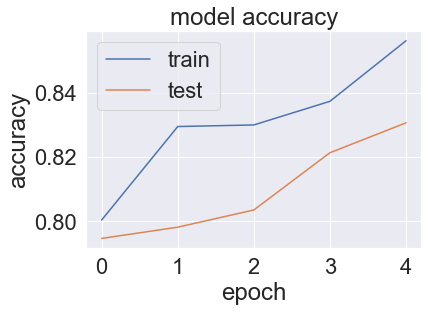

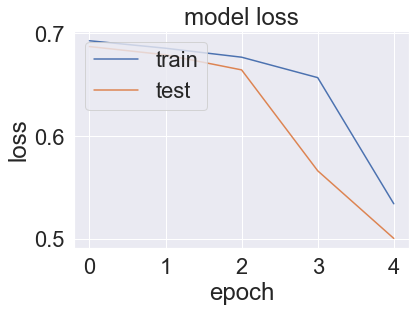

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Multilabel

In [78]:
X = []
for s in sentences:
    X.append(removeStopWords(s))

y = data_raw.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [79]:
ytrains=[]
ytests=[]
for column in y:
    y1_train = y_train[column].values
    y1_test =  y_test[column].values
    ytrains.append(y1_train)
    ytests.append(y1_test)

In [80]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [81]:
glove_file = open('C:/Users/skand/Downloads/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [82]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer1 = LSTM(128)(embedding_layer)
outs=[]
for column in y:
    output= Dense(1, activation='sigmoid')(LSTM_Layer1)
    outs.append(output)


model = Model(inputs=input_1, outputs=outs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [83]:
print(model.summary())

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 200, 100)     366100      input_6[0][0]                    
__________________________________________________________________________________________________
lstm_6 (LSTM)                   (None, 128)          117248      embedding_6[0][0]                
__________________________________________________________________________________________________
dense_414 (Dense)               (None, 1)            129         lstm_6[0][0]                     
____________________________________________________________________________________________

In [84]:
history = model.fit(x=X_train, 
    y=ytrains, batch_size=8192, epochs=5, verbose=1, validation_split=0.2)

Train on 265 samples, validate on 67 samples
Epoch 1/5
265/265 [==============================] - 34s 126ms/step - loss: 95.0280 - dense_414_loss: 0.7101 - dense_415_loss: 0.7025 - dense_416_loss: 0.6879 - dense_417_loss: 0.6927 - dense_418_loss: 0.6947 - dense_419_loss: 0.7033 - dense_420_loss: 0.6789 - dense_421_loss: 0.7008 - dense_422_loss: 0.6791 - dense_423_loss: 0.6918 - dense_424_loss: 0.6921 - dense_425_loss: 0.6919 - dense_426_loss: 0.6844 - dense_427_loss: 0.6854 - dense_428_loss: 0.6886 - dense_429_loss: 0.6991 - dense_430_loss: 0.6910 - dense_431_loss: 0.6965 - dense_432_loss: 0.6855 - dense_433_loss: 0.6784 - dense_434_loss: 0.6905 - dense_435_loss: 0.6945 - dense_436_loss: 0.6898 - dense_437_loss: 0.6940 - dense_438_loss: 0.6949 - dense_439_loss: 0.6959 - dense_440_loss: 0.7003 - dense_441_loss: 0.6974 - dense_442_loss: 0.6834 - dense_443_loss: 0.6825 - dense_444_loss: 0.6997 - dense_445_loss: 0.6960 - dense_446_loss: 0.6867 - dense_447_loss: 0.6981 - dense_448_loss: 0.6

In [61]:
X_train

array([[  1, 117,  91, ...,   5, 508, 576],
       [203,   0,   0, ...,   0,   0,   0],
       [184,   8,  23, ...,   0,   0,   0],
       ...,
       [272,  10, 567, ...,   0,   0,   0],
       [689, 783,  10, ...,   0,   0,   0],
       [839,  38, 222, ...,   0,   0,   0]])

In [85]:
score = model.evaluate(x=X_test, y=ytests, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

84/84 [==============================] - 1s 8ms/step
Test Score: 93.68059685116722
Test Accuracy: 0.6971673965454102


In [95]:
ytests[1]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

# Test:

In [97]:
new_complaint = ['Auxiliance Tunisia filiale du Groupe Athéna Global Service, (20 ans d existence en forte croissance) est spécialiste dans la représentation et la distribution de logiciels de sécurité informatique, à travers un vaste réseau de distribution, constitué de VAR, revendeurs locaux professionnels et des plus importantes enseignes spécialisées dans la distribution de logiciels et fournit aussi des prestations d externalisation de relation client et de marketing.Notre capacité d’investissement, la qualité de nos services et nos équipes font d’Auxiliance Tunisia et du Groupe Athéna Global Service des entreprises en plein essor avec un fort potentiel de développement.Votre capacité d’analyse, ainsi que votre sens de la performance vous permettront de réussir les projets qui vous seront confiés. Dans cet objectif, nous recherchons']

new_complaint = tokenizer.texts_to_sequences(new_complaint)
new_complaint = pad_sequences(new_complaint, padding='post', maxlen=maxlen)

pred = model.predict(new_complaint)

In [99]:
data_raw.columns[1:]

Index(['droit commercial ', 'droit des garanties ',
       'droit fiscal des entreprises ', 'droit patrimonial ',
       'régime matrimonial ', 'succession ', 'Droit bancaire',
       'droit des contrats ', 'droit commercial .1', 'droit des garanties .1',
       ...
       'management ', 'planification', 'organisationnel', 'hiérarchie ',
       'ordre ', 'règlement ', 'système gestion', 'ONU  ', 'plan', 'Agenda '],
      dtype='object', length=137)

In [123]:
df = pd.DataFrame(list(zip(data_raw.columns[1:], pred)), 
               columns =['skill', 'probability']) 

In [124]:
df

,skill,probability
0,droit commercial,[[0.4971404]]
1,droit des garanties,[[0.49861187]]
2,droit fiscal des entreprises,[[0.5007726]]
3,droit patrimonial,[[0.4973725]]
4,régime matrimonial,[[0.49910894]]
...,...,...
132,règlement,[[0.49635646]]
133,système gestion,[[0.49515095]]
134,ONU,[[0.49359742]]
135,plan,[[0.49622253]]


In [135]:
df.probability=[(lambda x: x[0][0])(x) for x in df.probability]

In [136]:
df.head()

,skill,probability
0,droit commercial,0.497140
1,droit des garanties,0.498612
2,droit fiscal des entreprises,0.500773
3,droit patrimonial,0.497373
4,régime matrimonial,0.499109


In [140]:
df.loc[df['probability'] >= 0.5].skill

2      droit fiscal des entreprises 
21                            BALE2 
36                         MS Office
43                          internet
60                           Word .1
71                     interface  .1
72                     programmeur.1
98                            équipe
99                           rigueur
105                bon relationnel.1
124                        Schedules
Name: skill, dtype: object